# Task 3 Linear Regression

##### Objective: Implement and understand simple & multiple linear regression.
##### Tools:  Scikit-learn, Pandas, Matplotlib
 

In [27]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
# Step 2: Load and Preprocess the Dataset

df = pd.read_csv("E:\\Elevate labs internship\\Housing.csv")

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [25]:
df.isnull().sum()

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
dtype: int64

In [31]:
# Step 3: Preprocessing
# Drop 'furnishingstatus' column as per instruction
if 'furnishingstatus' in df.columns:
    df = df.drop('furnishingstatus', axis=1)

In [32]:
# Encode 'yes'/'no' to 1/0 for categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [33]:
# Map yes->1, no->0
for col in categorical_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [34]:
# Handle any NaN values resulting from mapping
df[categorical_cols] = df[categorical_cols].fillna(0).astype(int)

In [35]:
# Finally, ensure no missing data
df = df.dropna()

In [36]:
# Check if all columns are numeric and clean
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Data types:
 price              int64
area               int64
bedrooms           int64
bathrooms          int64
stories            int64
mainroad           int32
guestroom          int32
basement           int32
hotwaterheating    int32
airconditioning    int32
parking            int64
prefarea           int32
dtype: object

Missing values:
 price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
dtype: int64


In [37]:
# Step 4: Feature selection
X_simple = df[['area']]  # for simple linear regression
y = df['price']

In [38]:
# For multiple linear regression, use more features
feature_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + categorical_cols
X_multi = df[feature_cols]

In [39]:
# Step 5: Split the dataset
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)


In [40]:
# Step 6: Create and Train Models
# Simple Linear Regression Model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

LinearRegression()

In [41]:
# Multiple Linear Regression Model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

LinearRegression()

In [42]:
# Step 7: Make Predictions
y_pred_simple = simple_model.predict(X_test_simple)
y_pred_multi = multi_model.predict(X_test_multi)

In [43]:
# Step 8: Evaluate the models
print("\n--- Simple Linear Regression Evaluation ---")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_simple, y_pred_simple))
print("Mean Squared Error (MSE):", mean_squared_error(y_test_simple, y_pred_simple))
print("R2 Score:", r2_score(y_test_simple, y_pred_simple))

print("\n--- Multiple Linear Regression Evaluation ---")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_multi, y_pred_multi))
print("Mean Squared Error (MSE):", mean_squared_error(y_test_multi, y_pred_multi))
print("R2 Score:", r2_score(y_test_multi, y_pred_multi))


--- Simple Linear Regression Evaluation ---
Mean Absolute Error (MAE): 1474748.1337969352
Mean Squared Error (MSE): 3675286604768.185
R2 Score: 0.27287851871974644

--- Multiple Linear Regression Evaluation ---
Mean Absolute Error (MAE): 979112.2162187375
Mean Squared Error (MSE): 1800793719718.9666
R2 Score: 0.6437296086614117


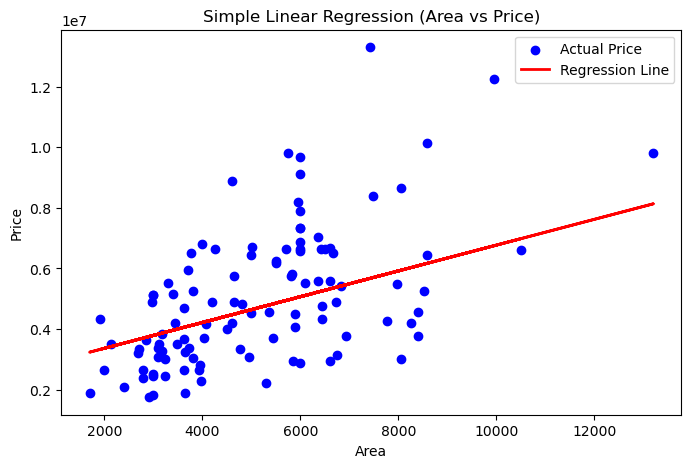

In [44]:
# Step 9: Plotting Simple Linear Regression Line
plt.figure(figsize=(8,5))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual Price')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression (Area vs Price)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

In [45]:
# Step 10: Interpret the models
# Simple Model Coefficients
print("\nSimple Linear Regression Coefficient (Area):", simple_model.coef_)
print("Simple Linear Regression Intercept:", simple_model.intercept_)

# Multiple Model Coefficients
print("\nMultiple Linear Regression Coefficients:")
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': multi_model.coef_
})
print(coef_df)


Simple Linear Regression Coefficient (Area): [425.72984194]
Simple Linear Regression Intercept: 2512254.2639593435

Multiple Linear Regression Coefficients:
            Feature   Coefficient
0              area  2.377105e+02
1          bedrooms  7.848365e+04
2         bathrooms  1.109326e+06
3           stories  4.269096e+05
4           parking  2.474431e+05
5          mainroad  4.126778e+05
6         guestroom  2.436064e+05
7          basement  4.350055e+05
8   hotwaterheating  7.122647e+05
9   airconditioning  8.084154e+05
10         prefarea  6.367877e+05


In [46]:
print("\nMultiple Linear Regression Intercept:", multi_model.intercept_)


Multiple Linear Regression Intercept: -72427.55025565624
